In [5]:
# %%
# Based on https://unidata.github.io/MetPy/latest/examples/cross_section.html#sphx-glr-examples-cross-section-py
"""
======================
Cross Section Analysis
======================

The MetPy function `metpy.interpolate.cross_section` can obtain a cross-sectional slice through
gridded data.
"""

import geoutils.utils.general_utils as gut
from importlib import reload
import geoutils.plotting.plots as cplt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import geoutils.utils.met_utils as mut
from metpy.units import units
import geoutils.utils.time_utils as tu
import geoutils.utils.file_utils as fut
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
import geoutils.geodata.multilevel_pressure as mp
output_dir = "/home/strnad/data/climnet/outputs/summer_monsoon/"
plot_dir = "/home/strnad/data/plots/summer_monsoon/"
data_dir = "/home/strnad/data/"
lat_range_cut = [-30, 70]
lon_range_cut = [-180, 180]


In [7]:

# %% #############################
# **Getting the data**
# ERA 5 data
reload(mp)
plevels = np.arange(100, 1050, 100)

nc_files_q = []
nc_files_t = []
for plevel in plevels:
    dataset_file_q = data_dir + \
        f"/climate_data/2.5/era5_q_{2.5}_{plevel}_ds.nc"
    nc_files_q.append(dataset_file_q)
    dataset_file_t = data_dir + \
        f"/climate_data/2.5/era5_t_{2.5}_{plevel}_ds.nc"
    nc_files_t.append(dataset_file_t)

time_range = ['1980-01-01', '2000-12-31']
ds_q = mp.MultiPressureLevelDataset(data_nc=nc_files_q,
                                    lon_range=lon_range_cut,
                                    lat_range=lat_range_cut,
                                    plevels=plevels,
                                    time_range=time_range,
                                    verbose=False,
                                    )
ds_t = mp.MultiPressureLevelDataset(data_nc=nc_files_t,
                                    lon_range=lon_range_cut,
                                    lat_range=lat_range_cut,
                                    plevels=plevels,
                                    metpy_unit='K',
                                    time_range=time_range,
                                    verbose=False,
                                    )

Time steps within 1980-01-01 to 2000-12-31 selected!
Time steps selected!
Load data from in time range (numpy.datetime64('1980-01-01'), numpy.datetime64('2000-12-31'))!
Created monthly anomalies!
Rename q to q_an_month!
Created JJASly anomalies!
Rename q to q_an_JJAS!
WARNING! No mask initialized!
Loaded Pressure levels [ 100  200  300  400  500  600  700  800  900 1000] as dimension lev!
Time steps within 1980-01-01 to 2000-12-31 selected!
Time steps selected!
Load data from in time range (numpy.datetime64('1980-01-01'), numpy.datetime64('2000-12-31'))!
Set units to K
Created monthly anomalies!
Rename t to t_an_month!
Created JJASly anomalies!
Rename t to t_an_JJAS!
WARNING! No mask initialized!
Loaded Pressure levels [ 100  200  300  400  500  600  700  800  900 1000] as dimension lev!


In [8]:
# Compute relative humidity
reload(mut)
rh = mut.specific_humidity_to_relative_humidity(
    pressure=ds_q.ds['lev'],
    temperature=ds_t.ds['t'],
    specific_humidity=ds_q.ds['q'],
    percentage=False
)
# %%
# Compute potential temperature
reload(mut)
pt = mut.potential_temperature(
    pressure=ds_t.ds['t'].lev,
    temperature=ds_t.ds['t']
)

In [9]:
# This example uses 18 UTC 04 April 1987 from NCEI.
date = tu.str2datetime('1987-04-04')

# Define start and end points:
start = (37.0, -105.0)
end = (35.5, -65.0)
lon_range = [start[1], end[1]]
lat_range = [start[0], end[0]]

# Get the cross section, and convert lat/lon to supplementary coordinates:
reload(mut)
reload(cplt)
test_data = ds_q.ds.sel(time=date,)
data_cross_section = gut.merge_datasets(rh,
                                        pt)
test_data = data_cross_section.sel(time=date,)
cross_q = mut.vertical_cross_section(test_data,
                                     lon_range=lon_range,
                                     lat_range=lat_range)

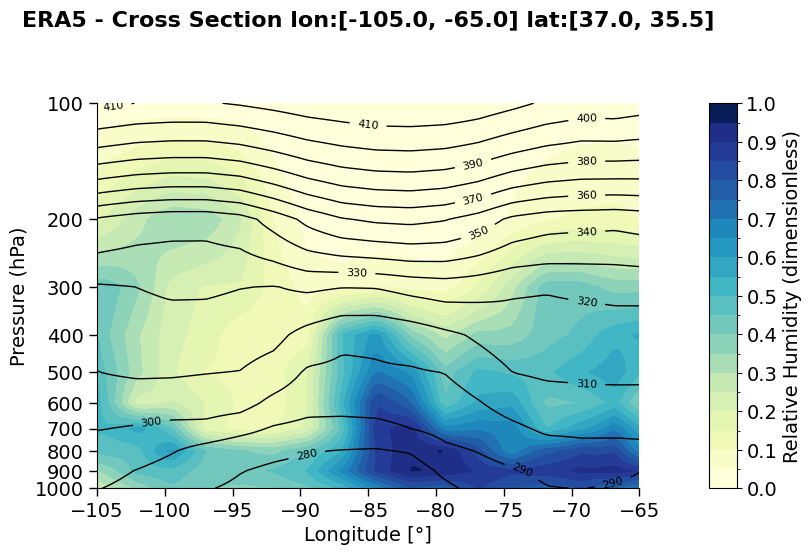

In [10]:

yticks = np.arange(1000, 50, -100)
im = cplt.plot_2D(x=cross_q['lon'],
                  y=cross_q['isobaric'],
                  z=cross_q['rh'],
                  plot_type='contourf',
                  levels=20,
                  cmap='YlGnBu',
                  label='Relative Humidity (dimensionless)',
                  orientation='vertical',
                  vmin=0, vmax=1,
                  xlabel='Longitude [°]',
                  ylabel='Pressure (hPa)',
                  flip_y=True,
                  ysymlog=True,
                  yticks=yticks,
                  title=f'ERA5 - Cross Section lon:{lon_range} lat:{lat_range}'
                  )
im = cplt.plot_2D(x=cross_q['lon'],
                  y=cross_q['isobaric'],
                  z=cross_q['pt'],
                  ax=im['ax'],
                  plot_type='contour',
                  color='k',
                  levels=20,
                  vmin=250, vmax=450,
                  lw=1,
                  clabel=True,
                  clabel_fmt='%i',
                  )